In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [338]:
def upstream_t(s, P_sol, A_q, L_conn, kappa=2000, factor=7/2, T_target=0.0): 
    print(P_sol/A_q)
    if factor != 7/2:
        target_factor = T_target**(7/2)
        q_factor = (P_sol/A_q) / L_conn
        second_factor = (s-L_conn)**2
        # print(target_factor, '{:.1e}'.format(q_factor), second_factor/kappa)
        # return (factor*(P_sol/A_q)*L_conn/kappa)**(7/2)
        return (target_factor + factor*q_factor*second_factor/kappa)**(2/7)
        # return (T_target**(7/2) + factor*(P_sol/(L_conn*A_q))*(((s-L_conn)**2) / kappa))**(2/7)
    return (T_target**(7/2) + factor * ((P_sol/A_q)*(L_conn-s)) / (kappa))**(2/7)

158.66415674629215


/tmp/ipykernel_40745/1539528811.py:10: RuntimeWarning: invalid value encountered in power
  return (T_target**(7/2) + factor * ((P_sol/A_q)*(L_conn-s)) / (kappa))**(2/7)


(0.0, 105.0)

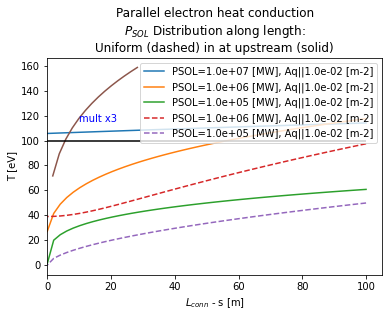

In [300]:
L = 100
radius = np.linspace(0, 100)
P_sol = 10e5
A_q = 1e-2
# print(upstream_t(0, P_sol=P_sol, A_q=A_q, L_conn=100, factor=7/4, T_target=39))

P_sol = 10e6
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, T_target=317)/3.0, label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q))
P_sol = 10e5
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, T_target=27), label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q))
P_sol = 10e4
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, T_target=1), label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q))

P_sol = 10e5
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, factor=7/4, T_target=39), label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q),  ls='--')
P_sol = 10e4
A_q = 1e-2
plt.plot(L - radius, upstream_t(radius, P_sol=P_sol, A_q=A_q, L_conn=100, factor=7/4.0), label='PSOL={:.1e} [MW], Aq||{:.1e} [m-2]'.format(P_sol, A_q), ls='--')


plt.title('Parallel electron heat conduction\n$P_{SOL}$ Distribution along length:\nUniform (dashed) in at upstream (solid)')
plt.legend()
plt.xlabel('$L_{conn}$ - s [m]')
plt.ylabel('T [eV]')
plt.hlines(100, 0, 100, color='black')
plt.annotate('mult x3',xy=(10, 115), color='blue')
# plt.ylim(0, 200)
plt.xlim(0, 105)


In [290]:
major_r = 3.0
B_pol = 0.4
B_T = 2.0
lambda_q = 2/1000
q95 = 3.0

P_sol = 10e6

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q

L_conn = np.pi*major_r*q95


print(area, L_conn)
t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)
print(t_sep_approx)

0.012566370614359173 28.274333882308138
121.35409864625682


In [231]:
upstream_t(s, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)

1.75

In [232]:
7/2

3.5

961561114.5135342
156.15106457618725
961561114.5135342
994718394.3243457
163.19311049923655 31.8871654339364
994718394.3243457


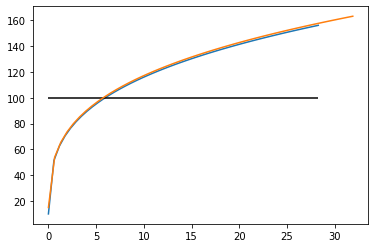

In [342]:
P_sol = 10e6

major_r = 3.0
B_pol = 0.4
B_T = 2.5
lambda_q = 2/1000
q95 = 3.0

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q
L_conn = np.pi*major_r*q95
t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=0.0)
print(t_sep_approx)
plt.close('all')
radius = np.linspace(0, L_conn)
plt.plot(L_conn - radius, upstream_t(radius, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=10.0))
plt.hlines(100, 0, L_conn, color='black')

major_r = 2.90
B_pol = 0.4
B_T = 2.5
lambda_q = 2/1000
q95 = 3.5

area = 4*np.pi*major_r*B_pol/(B_T+B_pol)*lambda_q
L_conn = np.pi*major_r*q95

t_sep_approx = upstream_t(0, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=15.0)
print(t_sep_approx, L_conn)
radius = np.linspace(0, L_conn)
plt.plot(L_conn - radius, upstream_t(radius, P_sol, area, L_conn, kappa=2000, factor=7/2, T_target=15.0))

